In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import statsmodels.api as sm
from sklearn.decomposition import PCA

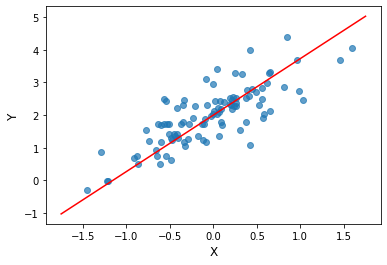

In [2]:
np.random.seed(265)
X = np.vstack((np.random.normal(0, 1, size=100), \
               np.random.normal(0, 0.3, size=100))).T
theta = np.pi/3
R = np.array([np.cos(theta), np.sin(theta),\
              -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = np.dot(X, R)
X[:,1] = X[:,1]+2
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.70)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
xtrue = np.linspace(-1.75,1.75,100)
ytrue = 3**(0.5)*xtrue+2
plt.plot(xtrue, ytrue, '-r')
plt.show()

Slope = √3

Intercept = 2

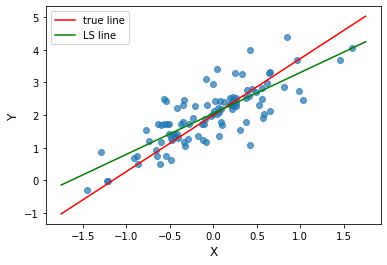

In [3]:
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.70)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
xtrue = np.linspace(-1.75,1.75,100)
ytrue = 3**(0.5)*xtrue+2
plt.plot(xtrue, ytrue, '-r', label = 'true line')
Yfit = np.array(X[:,1])
Xfit = np.array(X[:,0])
Xfit = sm.add_constant(Xfit)
model = sm.OLS(Yfit,Xfit)
results = model.fit()
yreg = results.params[1]*xtrue+results.params[0]
plt.plot(xtrue, yreg, '-g', label = 'LS line')
plt.legend(loc='best')
plt.show()


The slope of the line created by the first principal component is ~1.7569 and it is very close to the value of the true slope (1.7321). It makes sense given that the points where distributed around an axis then rotated, that the line that explains the greatest variance in the data would be similar to the true line. 

1.7320508075688772
1.756850590332569


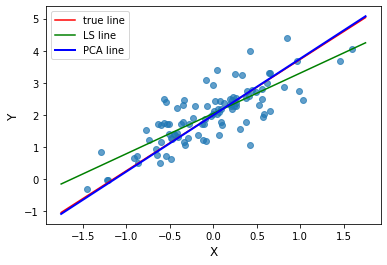

In [4]:
plt.scatter(np.array(X[:,0]), np.array(X[:,1]), alpha=.70)
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
xtrue = np.linspace(-1.75,1.75,100)
ytrue = 3**(0.5)*xtrue+2
plt.plot(xtrue, ytrue, '-r', label = 'true line')
print(3**(0.5))

Yfit = np.array(X[:,1])
Xfit = np.array(X[:,0])
Xfit = sm.add_constant(Xfit)
model = sm.OLS(Yfit,Xfit)
results = model.fit()
yreg = results.params[1]*xtrue+results.params[0]
plt.plot(xtrue, yreg, '-g', label = 'LS line')

Xcenter=np.empty(X.shape)
Xcenter[:,0] = X[:,0] - np.mean(X[:,0])
Xcenter[:,1] = X[:,1] - np.mean(X[:,1])
pca = PCA().fit(Xcenter)
principal_vectors = pca.components_
principal_vectors[0]
pc1 = principal_vectors[0]
slope = pc1[1]/pc1[0]
plt.plot([-1.75, 1.75], [-1.75*slope+np.mean(X[:,1]), \
                         1.75*slope+np.mean(X[:,1])]\
         , color = 'b', linewidth=2, label= 'PCA line')
print(slope)

plt.legend(loc='best')
plt.show()

The least-squared regression line aims to reduce the sum of squared residuals, while the first principal component aims to find the line that explains the most variance in the data (LS minimizes vertical distance, while PCA minimizes orthogonal distance). One is not necessarily a better fit that the other. One may be less or more approriate depending on what you are trying to measure in your data. 

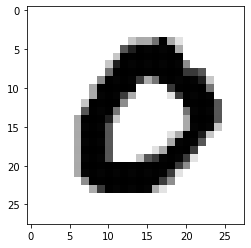

In [5]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(7777) 
my_numimage = np.random.randint(0, len(y), size=1)
plt.imshow(x[my_numimage,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

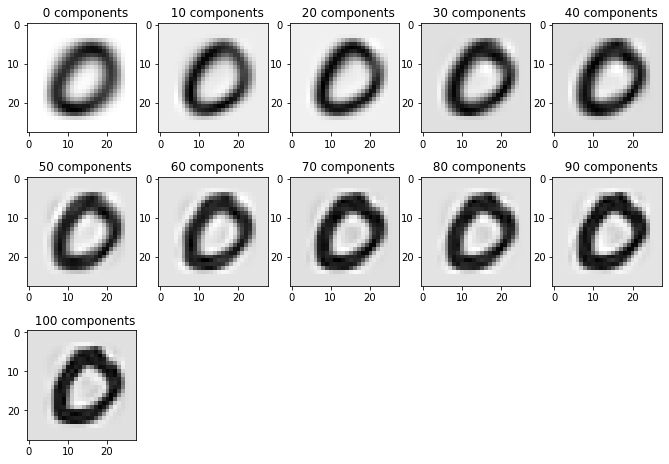

In [6]:
avgimg=x.mean(0)
cimages = np.subtract(x, avgimg)
cimages = cimages.reshape(cimages.shape[0], 28*28)
plt.figure(figsize=(9,6.5))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
numcomps=[0,10,20,30,40,50,60,70,80,90,100]
for k in numcomps:
    num_components = k
    pca = PCA(num_components).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((num_components, 28, 28))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg.reshape(28*28))
    plt.subplot(3,5, int((k+10)/10))
    plt.title(label= k)
    plt.title(label= " % d components" % num_components)
    plt.imshow(approx[my_numimage,:].reshape((28, 28)), \
               cmap=plt.cm.gray.reversed())



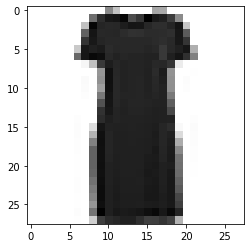

In [7]:
(x, y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==3)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(7777) 
my_numimage = np.random.randint(0, len(y), size=1)
plt.imshow(x[my_numimage,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

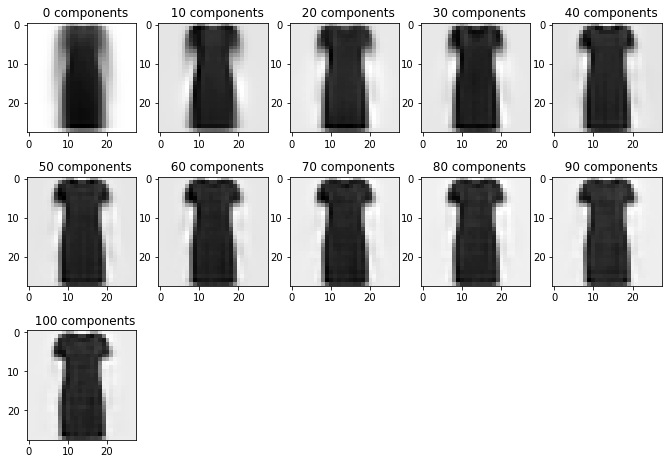

In [8]:
avgimg=x.mean(0)
cimages = np.subtract(x, avgimg)
cimages = cimages.reshape(cimages.shape[0], 28*28)
plt.figure(figsize=(9,6.5))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for k in numcomps:
    num_components = k
    pca = PCA(num_components).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((num_components, 28, 28))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg.reshape(28*28))
    plt.subplot(3,5, int((k+10)/10))
    plt.title(label= " % d components" % num_components)
    plt.imshow(approx[my_numimage,:].reshape((28, 28)), \
               cmap=plt.cm.gray.reversed())



In [9]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

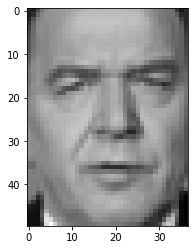

In [10]:
x = lfw_people.data
y = lfw_people.target
zeros = np.where(y==4)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(2)
my_numimage = np.random.randint(0, len(y), size=1)
plt.imshow(x[my_numimage,:].reshape((50,37)), cmap=plt.cm.gray)



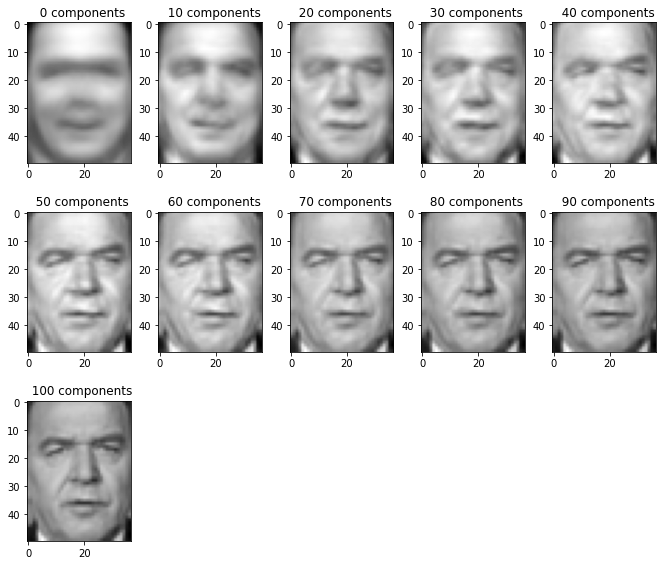

In [11]:
avgimg=x.mean(0)
cimages = np.subtract(x, avgimg)
cimages = cimages.reshape(cimages.shape[0], 50*37)
plt.figure(figsize=(9,8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for k in numcomps:
    num_components = k
    pca = PCA(num_components).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((num_components, 50, 37))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg.reshape(50*37))
    plt.subplot(3, 5, int((k+10)/10))
    plt.title(label= " % d components" % num_components)


    plt.imshow(approx[my_numimage,:].reshape((50, 37)), cmap=plt.cm.gray)



In [12]:
from sklearn.linear_model import LogisticRegression
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
foursandnines =np.logical_or(y==1,y==9)
x = x[foursandnines,:]
y = y[foursandnines]

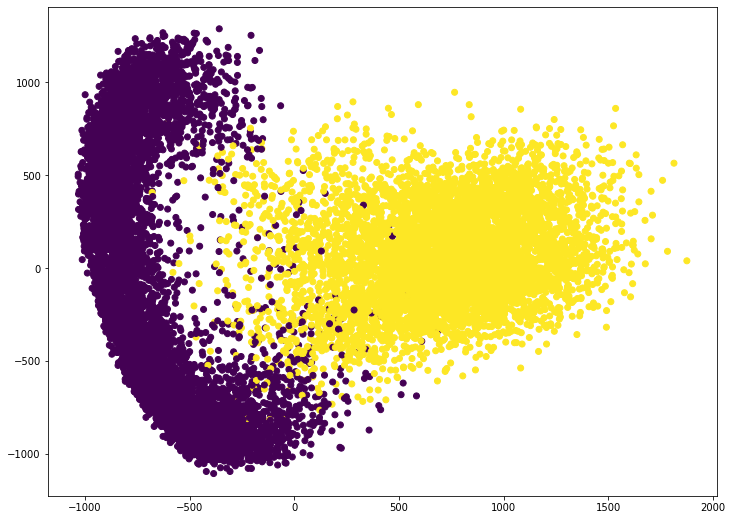

In [13]:
avgimg = x.mean(0)
cimages = np.subtract(x, avgimg)
pca = PCA(2).fit(cimages)
principal_vectors = pca.components_
principal_vectors = principal_vectors.reshape((2, 28, 28))
pcs = pca.fit_transform(cimages)
fig = plt.figure(figsize = (12, 9))
scatter = plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.show()

"4" and "9" look relatively similar, so it makes sense that using two principal components it is nearly impossible to distinguish between the two and that the two shapes look similar. There is some separation between the clusters, however, more components would be needed to get a better separation. 

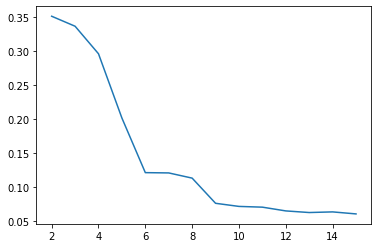

In [14]:
err=[]
lr = LogisticRegression(solver='lbfgs')
(x, y), (x_test, y_test)= tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
foursandninestrain =np.logical_or(y==4, y==9)
x = x[foursandninestrain,:]
y = y[foursandninestrain]
avg_imag = x.mean(0)
cimages = np.subtract(x, avg_imag)

for k in range (2,16):
    
    pca = PCA(k).fit(cimages)
    principal_vectors = pca.components_
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs) + avg_imag

    lr.fit(capprox, y)
    this_err = np.mean(lr.predict(capprox) != y)
    err.append(this_err)
    
plt.plot(range(2,16), err)

This plot makes sense as it shows that as the number of principal components increases, the error rate decreases. The more components we add the more accurately they represent the data and thus classify more letters correctly. This decrease is significant until 9 components. However, after 9, the error rate only decreases by a little, which could be explained by the fact that 9 principal components are enough to represent the variance in the dataset.

In [15]:

k=10
pca = PCA(k).fit(cimages)
principal_vectors = pca.components_
principal_vectors = principal_vectors.reshape((k, 28, 28))
pcs = pca.fit_transform(cimages)
capprox = pca.inverse_transform(pcs)
lr.fit(capprox, y)
this_err = np.where(lr.predict(x) != y)
misclass= this_err[0]



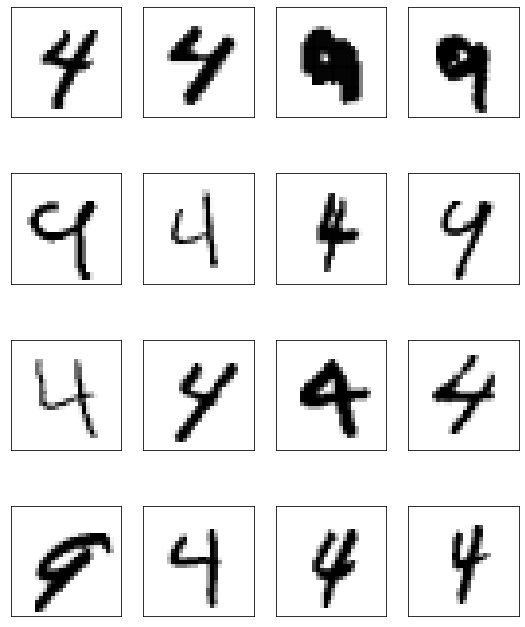

In [16]:

from random import sample 
images = x
mis_samples = sample(list(misclass),16)
plt.figure(figsize=(1.8 * 4, 2.4 * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[mis_samples[i]].reshape((28, 28)), \
               cmap=plt.cm.gray.reversed())
    plt.xticks(())
    plt.yticks(())

It makes sense that these are the letters that are most difficult to distinguish. They are written in such a way that they bear resemblence to both letters. 

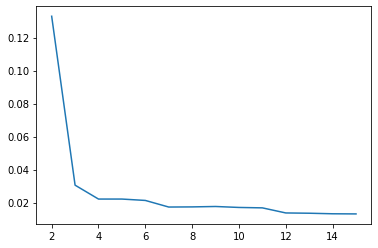

In [17]:
err=[]
(x, y), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
fashion = x.reshape([60000, 28*28])
foursandeights =np.logical_or(y==4, y==8)
fashion = fashion[foursandeights,:]
y = y[foursandeights]
avg_imag = fashion.mean(0)
cimages = np.subtract(fashion, avg_imag)

for k in range (2,16):
    
    pca = PCA(k).fit(cimages)
    principal_vectors = pca.components_
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs) + avg_imag

    lr.fit(capprox, y)
    this_err = np.mean(lr.predict(capprox) != y)
    err.append(this_err)
    
plt.plot(range(2,16), err)

Using the same logic is above, it makes sense that the error goes down as the number of components added goes up. However, unlike in the previous example, coats and handbags are much more distinct than handwritten "4" and "9", therefore only 3-4 components are needed to make a fairly accurate prediction of what is in the picture. 